In [1]:
from sklearn.cluster import OPTICS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score,)


In [2]:
data=pd.read_csv('data.csv')

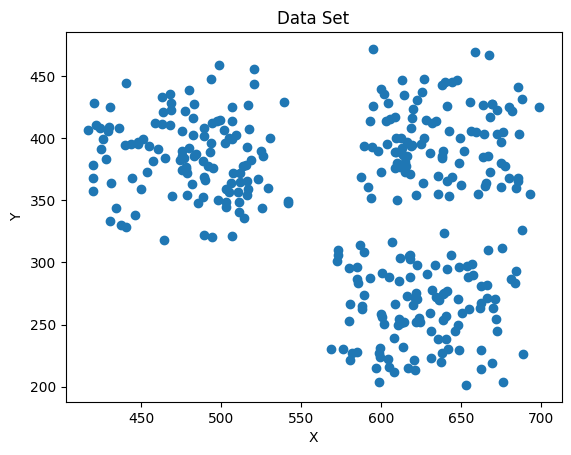

In [3]:
#plot the dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### Optics Clustering

* Description: OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm that identifies clusters of varying densities in spatial data. It works by ordering data points based on their density and connectivity, creating a reachability plot that helps visualize the clustering structure. Unlike DBSCAN, OPTICS does not require a single density threshold; instead, it produces an augmented ordering of the database, representing its density-based clustering structure. This allows OPTICS to detect clusters of different densities and handle data with varying densities more effectively.

In [31]:
# initialize and fit the HDBSCAN model and evaluate the model to find the best parameters
def evaluate_optics(data, min_samples_list: list)->tuple:
    silhouette,davies_bouldin,calinski_harabasz = [],[],[]
    for min_samples in min_samples_list:
        
        Optics_model =OPTICS(min_samples=min_samples, xi=0.05)
        cluster_labels = Optics_model.fit(data).labels_
        silhouette.append(round(silhouette_score(data, cluster_labels),4))
        davies_bouldin.append(round(davies_bouldin_score(data, cluster_labels),4))
        calinski_harabasz.append(round(calinski_harabasz_score(data, cluster_labels),4))
    return (silhouette,davies_bouldin,calinski_harabasz)

In [33]:
min_samples_list = np.arange(0.01,0.3,0.01)
results = evaluate_optics(data, min_samples_list)

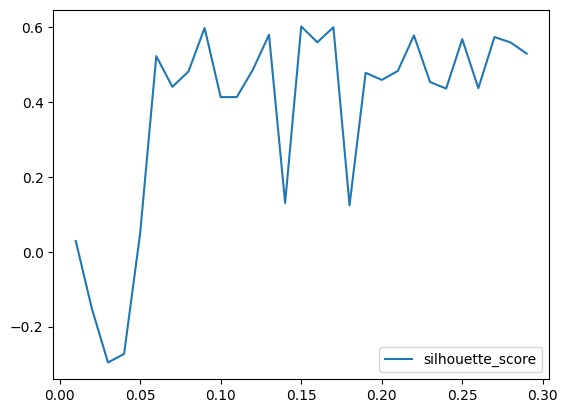

In [34]:
"""The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 
It ranges from -1 to 1, where higher values indicate better clustering."""

plt.plot(min_samples_list,results[0],label='silhouette_score')
plt.legend()
plt.show()

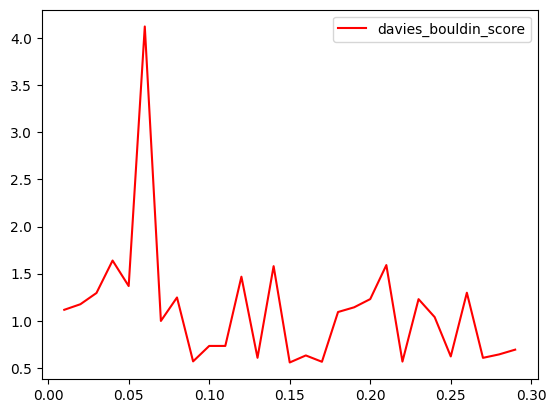

In [35]:
"""The Davies-Bouldin Index is the average similarity ratio of each cluster with 
its most similar cluster, where lower values indicate better clustering."""

plt.plot(min_samples_list,results[1],label='davies_bouldin_score',color='red')
plt.legend()
plt.show()

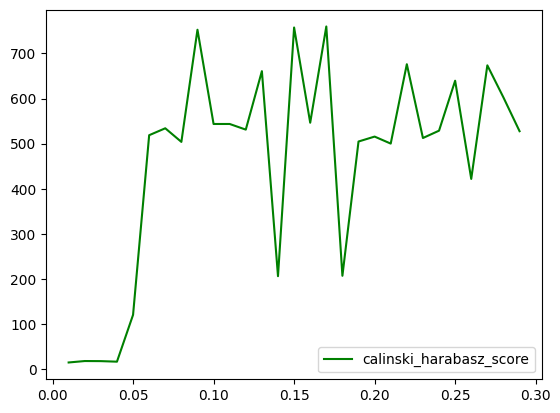

In [36]:
"""The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is the ratio of 
the sum of between-cluster dispersion and within-cluster dispersion. Higher values indicate better clustering."""

plt.plot(min_samples_list,results[2],label='calinski_harabasz_score',color='green')
plt.legend()
plt.show()

In [53]:
# based on the results the optimal number of min_samples is 0.09
cluster = OPTICS(min_samples=0.09, xi=0.04)
cluster_labels = cluster.fit_predict(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster_labels),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster_labels),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster_labels),4))

the best silhouette_score = 0.4087
the best davies_bouldin_score = 0.7476
the best calinski_harabasz_score = 521.1414


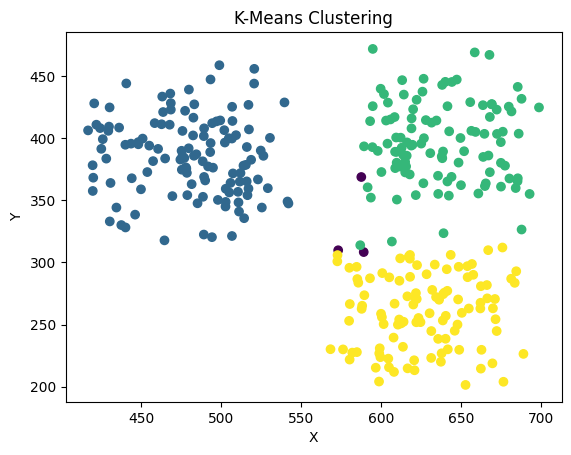

In [54]:
# plot the cluster 

plt.scatter(data['X'],data['Y'],c=cluster_labels)
plt.title('K-Means Clustering')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()